In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
retaildata=pd.read_csv('E:\\Personal\\DataScience\\RegressionFiles\\RetailData\\retail-data-analytics\\sales data-set.csv')
retaildata.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [4]:
def missingValuesInfo(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100, 2)
    temp = pd.concat([total, percent], axis = 1,keys= ['Total', 'Percentage'])
    return temp.loc[(temp['Total'] > 0)]

missingValuesInfo(retaildata)

,Total,Percentage


In [8]:
retaildata.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [152]:
departments=retaildata['Dept'].unique().tolist()
stores=retaildata['Store'].unique().tolist()
dates=retaildata['Date'].unique().tolist()

stores_sales_values=retaildata[retaildata['Dept']==1].groupby(['Store']).agg({'Weekly_Sales':'sum'})

Dept_sales_values=retaildata.groupby(['Dept']).agg({'Weekly_Sales':'sum'})

date_sales_vales=retaildata.groupby(['Date']).agg({'Weekly_Sales':'sum'})

print(stores,departments)
print(stores_sales_values.head(),Dept_sales_values.head(),date_sales_vales.head())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45] [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 40, 41, 42, 44, 45, 46, 47, 48, 49, 51, 52, 54, 55, 56, 58, 59, 60, 67, 71, 72, 74, 77, 78, 79, 80, 81, 82, 83, 85, 87, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 39, 50, 43, 65]
       Weekly_Sales
Store              
1        3219405.18
2        4401251.25
3        1047992.81
4        5288131.43
5        1397761.09       Weekly_Sales
Dept              
1     1.236388e+08
2     2.806112e+08
3     7.589245e+07
4     1.671467e+08
5     1.356074e+08             Weekly_Sales
Date                    
01/04/2011   43458991.19
01/06/2012   48281649.72
01/07/2011   47578519.50
01/10/2010   42239875.87
02/03/2012   46861034.97


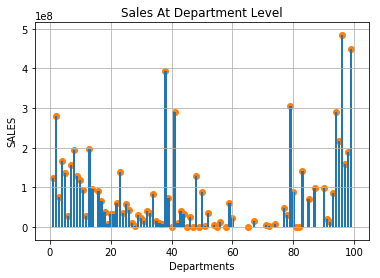

In [151]:
plt.bar(departments,Dept_sales_values['Weekly_Sales'])
plt.scatter(departments,Dept_sales_values['Weekly_Sales'])
plt.xlabel('Departments')
plt.ylabel('SALES')
plt.title('Sales At Department Level')
plt.grid(True)
plt.show()


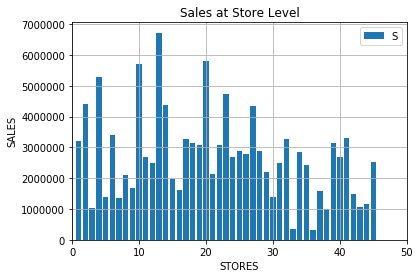

In [129]:
#plt.bar(stores,departments)

plt.bar(stores,stores_sales_values['Weekly_Sales'],label='Sales')
#plt.bar(stores,departments,label='Dept')
plt.legend('Sales')
plt.xlabel('STORES')
plt.ylabel('SALES')
plt.xlim(0,50)
plt.title("Sales at Store Level")
plt.grid(True)
plt.show()

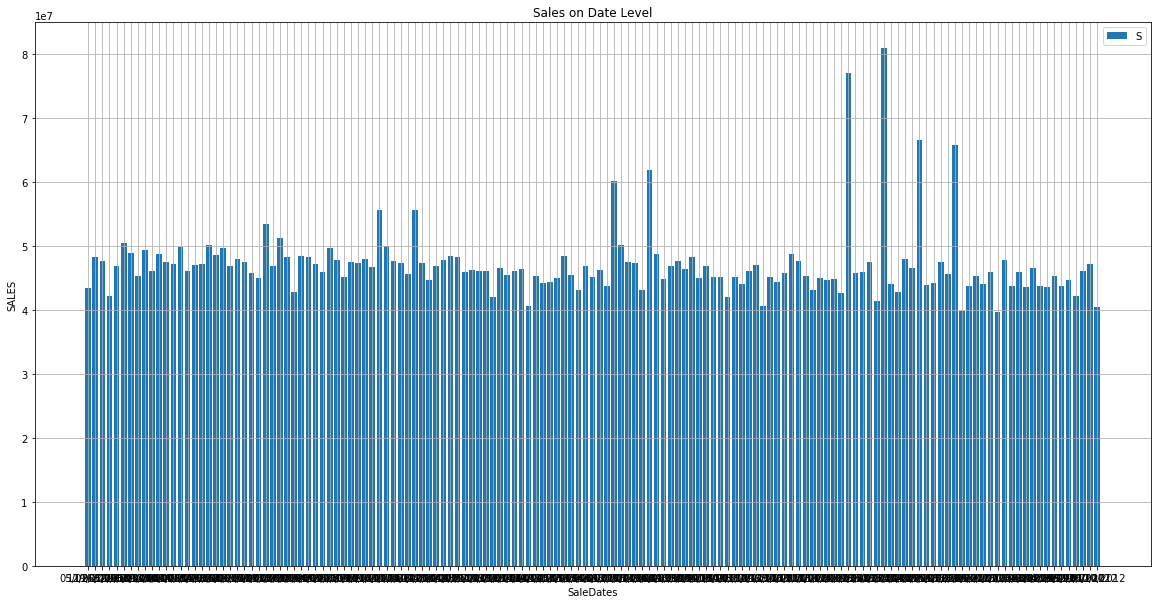

In [164]:
max_date=max(dates)
min_date=min(dates)

plt.figure(figsize=(20,10))
plt.bar(dates,date_sales_vales['Weekly_Sales'],label='Sales')

plt.legend('Sales')
plt.xlabel('SaleDates')
plt.ylabel('SALES')
plt.title("Sales on Date Level")
plt.grid(True)
plt.show()


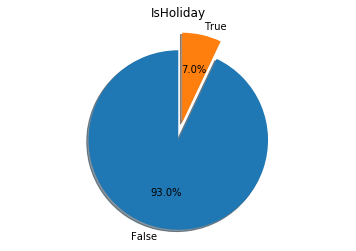

In [191]:
holiday=retaildata['IsHoliday'].tolist()

count_of_T=holiday.count(True)
count_of_F=holiday.count(False)


# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'False', 'True'
sizes = [count_of_F,count_of_T]
explode = (0, 0.2)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('IsHoliday')
plt.show()

<BarContainer object of 143 artists>

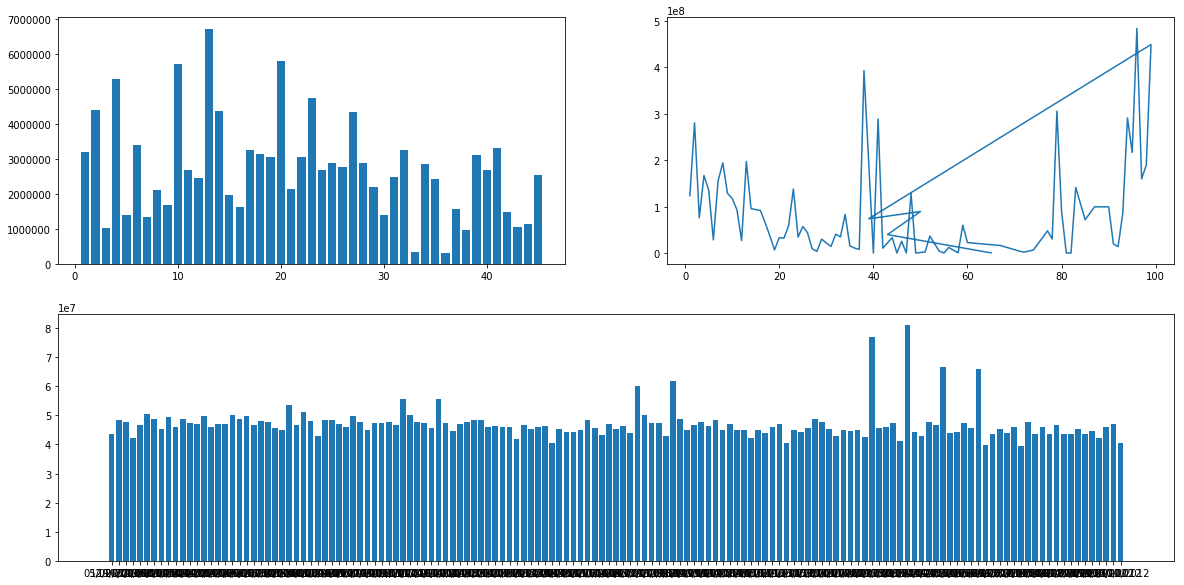

In [203]:
fig=plt.figure(figsize=[20,10])

def createPlot(xvalues,yvalues):
    xs=[]
    ys=[]
    
    xs=xvalues
    ys=yvalues
    
    return xs,ys


ax1=fig.add_subplot(221)
ax2=fig.add_subplot(222)
ax3=fig.add_subplot(212)

x,y=createPlot(stores,stores_sales_values['Weekly_Sales'].tolist())
ax1.bar(x,y)

x,y=createPlot(departments,Dept_sales_values['Weekly_Sales'].tolist())
ax2.plot(x,y)

x,y=createPlot(dates,date_sales_vales['Weekly_Sales'].tolist())
ax3.bar(x,y)


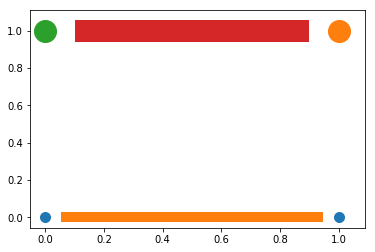

In [160]:
fig,ax = plt.subplots()

ax.plot([0],[0], marker="o",  markersize=10)
ax.plot([0.07,0.93],[0,0],    linewidth=10)
ax.scatter([1],[0],           s=100)

ax.plot([0],[1], marker="o",  markersize=22)
ax.plot([0.14,0.86],[1,1],    linewidth=22)
ax.scatter([1],[1],           s=22**2)

plt.show()

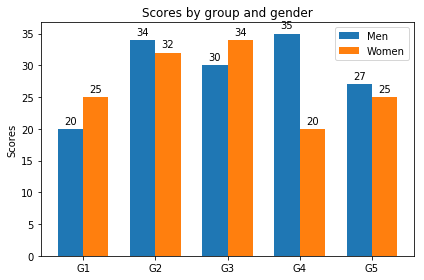

In [168]:

labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()